In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.conv_learner import *
from fastai.dataset import *
from fastai.transforms import *
from fastai.models import *
from fastai.sgdr import *
from fastai.plots import *

import pandas as pd

In [5]:
home = os.path.expanduser('~')
data_dir = Path(os.path.join(home,'data/kaggle/dog-breed-identification'))
train_dir = data_dir.joinpath('train')
test_dir = data_dir.joinpath('test')

In [7]:
print('no of training images: ',len(os.listdir(data_dir.joinpath('train'))))
print('no of test images    : ',len(os.listdir(data_dir.joinpath('test'))))


labels = pd.read_csv(data_dir.joinpath('labels.csv'))
labels['id'] += '.jpg'
labels.to_csv(data_dir.joinpath('labels_ext.csv'),index=False)
print('no of breeds         : ', labels['breed'].nunique())
labels.head()

no of training images:  10222
no of test images    :  10357
no of breeds         :  120


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


#### Check the class distribution


In [8]:
def show_img(img,ax,figsize):
    ax.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
def draw_text(ax, xy, text, size=14):
    text = ax.text(*xy,text,verticalalignment='top',color='white',fontsize=size,weight='bold')
    draw_outline(text,1)
    
def show_imgs(imgs,rows=3,cols=3,figsize=(8,6)):
    fig, axes = plt.subplots(rows, cols,)
    for idx, ax in enumerate(axes.flat):
        show_img(img=imgs[idx],ax=ax,figsize=figsize)
#         draw_text()

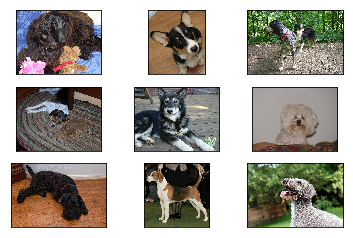

In [9]:
sample_train_paths = random.choices(os.listdir(train_dir),k=9)
sample_train_paths = [os.path.join(train_dir,o) for o in sample_train_paths]
sample_train_imgs = [open_image(o) for o in sample_train_paths]

show_imgs(sample_train_imgs,3,3,(12,12))

In [13]:
arch = resnet34
sz = 224
bs = 64

tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on)
data = ImageClassifierData.from_csv(data_dir,'train',data_dir.joinpath('labels_ext.csv'),bs=64,tfms=tfms,test_name='test')
learn = ConvLearner.pretrained(arch, data)

In [52]:
learn.lr_find()

 95%|█████████▍| 121/128 [00:50<00:02,  2.40it/s, loss=25.5]

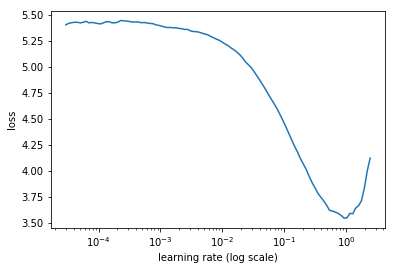

In [53]:
learn.sched.plot()

In [11]:
learn.fit(0.1,n_cycle=4)
learn.save('breeds-1')

epoch      trn_loss   val_loss   accuracy                   
    0      1.311872   0.677504   0.789628  
    1      0.882947   0.630439   0.816047                    
    2      0.711229   0.565005   0.823875                    
    3      0.626335   0.564651   0.833659                    



In [15]:
learn.load('breeds-1')
preds = learn.predict(is_test=True)

In [27]:
print('shape of predictions: ', preds.shape)
print('no of classes: ', len(data.classes))
files = [o.split('/')[-1] for o in data.test_ds.fnames]
ids = [o.split('.')[0] for o in files]
print(ids[:2])
print(len(ids))

shape of predictions:  (10357, 120)
no of classes:  120
['bf42e3a0ab4afdecc5e26fc0cf651da1', '9a1f108a37b3bd43edbf5d41c67d527c']
10357


In [43]:
df.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier,id
0,-18.549160,-14.762392,-16.904442,-13.657563,-19.263786,-11.537458,-16.579063,-15.608324,-8.433904,-11.212982,...,-16.770451,-17.011751,-12.100702,-18.838549,-0.006255,-17.343704,-17.343668,-15.012433,-16.309021,bf42e3a0ab4afdecc5e26fc0cf651da1
1,-13.269127,-16.187611,-15.102391,-17.806137,-20.319258,-13.820091,-16.572439,-14.620220,-11.129333,-11.397439,...,-14.574197,-16.786957,-13.613141,-18.566139,-6.942367,-13.607817,-18.587040,-14.522070,-11.597927,9a1f108a37b3bd43edbf5d41c67d527c
2,-6.534067,-2.205300,-8.248133,-7.374963,-10.131574,-9.265360,-10.202669,-10.454570,-6.459154,-9.353162,...,-11.159052,-9.359123,-9.244506,-10.155128,-8.368272,-7.902297,-10.284643,-11.937898,-7.960555,4c3fb315701d8760182459ae74e1a314
3,-15.459275,-14.485828,-14.293356,-13.244299,-0.044735,-14.070550,-13.190190,-13.364743,-14.058156,-11.914243,...,-12.170051,-12.665668,-11.365927,-10.797853,-15.256371,-11.327302,-11.070992,-15.514977,-14.581787,ffadae851b94ece57602da7edf72d689
4,-14.606531,-14.734798,-11.633821,-13.751388,-0.050119,-9.534079,-10.061442,-8.234615,-11.458543,-7.987600,...,-7.014651,-12.685273,-4.322220,-10.865681,-12.668488,-10.071798,-8.892614,-8.911535,-13.382539,ab398a45b623e9a24f842132fe816b6a


In [44]:
probs = np.exp(preds)
df = pd.DataFrame(data=probs,columns=data.classes)
df['id'] = ids
cols = ['id']
cols.extend(data.classes)
# print(cols)
df.reindex(columns=cols).to_csv('dog_breed.csv',index=False)

In [45]:
!kaggle competitions submit -c dog-breed-identification -f 'dog_breed.csv' -m 'breeds-1'

Successfully submitted to Dog Breed Identification

This gives a kaggle score of 0.56706 (could have been a position of 718/1286)